In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

# Problem 6

Generate an i.i.d. sample $x_1, \ldots, x_n, n=11, \alpha = 3, k = 2$ from a Pareto distribution with density

$$
f(x) = \frac{\alpha k^{\alpha}}{x^{\alpha + 1}}, \quad 0 < k < x, \: \: \alpha > 2.
$$

**(a)** Give a plug in estimator for $\alpha$ and $\theta = \frac{\alpha}{(\alpha-1)^2(\alpha-2)}$

**(b)** Calculate a bootstrap confidence interval for $\theta$.

# Solution

**Step 3:** First, we generate the observed data $x_1, \ldots, x_n$ (real world).

In [2]:
# Setting the parameters
k = 2
alpha = 3
n = 11

In [3]:
# Sample numpy
x = (np.random.pareto(alpha, n) + 1) * k

In [4]:
alphaGrid = np.linspace(0.1, 10, 1000)
logLike = n*np.log(alphaGrid) + n*alphaGrid*np.log(k) - (1+alphaGrid)*np.sum(np.log(x))
alphaHat = n/(np.sum(np.log(x)) - n*np.log(k))

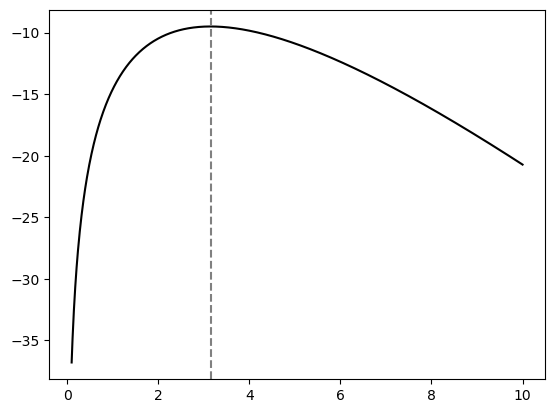

In [5]:
plt.plot(alphaGrid, logLike, color='black')
plt.axvline(alphaHat, color='gray', linestyle='dashed')
plt.show()

Plot ECDF

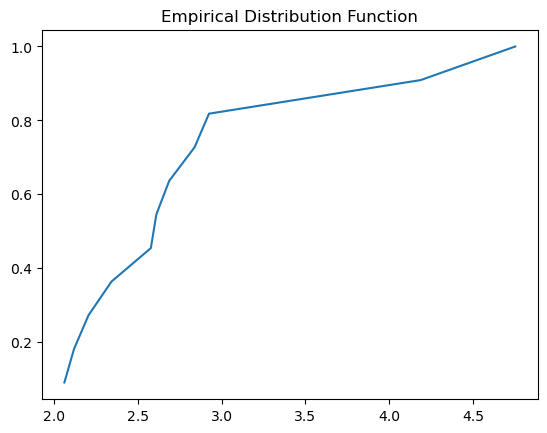

In [6]:
res = ECDF(x)

plt.plot(res.x, res.y)
plt.title("Empirical Distribution Function")
plt.show()

**Step 4,5:** Next, we enter bootstrap world and create bootstrap replications, $\widehat{F}_n$.

In [7]:
B = 1000
repl = np.random.choice(x, size=(B,n), replace=True, p=None)

**Step 6:** Calculate $\hat{\Theta}_{(j)}^* = \hat{\Theta}(x_{(j)}^*)$ using MLE

In [8]:
alphaHatBoot = np.zeros(B)

for i in range(B):
    alphaHatBoot[i] = n/(np.sum(np.log(repl[i])) - n*np.log(k))

thetaHatBoot = alphaHatBoot / ((alphaHatBoot - 1)**2 * (alphaHatBoot - 2))

In [9]:
print(f'Mean alphaHatBoot = {np.mean(alphaHatBoot)}')
print(f'Mean thetaHatBoot = {np.mean(thetaHatBoot)}')

Mean alphaHatBoot = 3.3181227784634695
Mean thetaHatBoot = 0.8507512037875422


In [10]:
np.std(alphaHatBoot)

0.845142244515472

**Step 7:** calculate boostrap confidence interval

In [11]:
# Percentile Bootstrap Confidence Interval
lower1 = np.percentile(thetaHatBoot, 2.5)
upper1 = np.percentile(thetaHatBoot, 97.5)
print(lower1, upper1)

0.06856555282008406 9.607248635660225
